<a href="https://colab.research.google.com/github/brunoegs/DiploDatos2021/blob/main/intro-aprendizaje-automatico/entregables/entregable-parte-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [48]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [49]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [50]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

In [51]:
# creating pandas df and seeing statistics
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['MEDV'] = boston['target']

boston_df
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [52]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [53]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El dataset se trata de precios de casas en Boston, USA. Es un dataset de caracter experimental siendo que fue utilizado en varios papers para "atacar" problemas de regresion en ML.
2. La variable objectivo es MEDV (acorde a la descripcion del dataset). Es el valor medio de las viviendas ocupadas por sus dueños. Es una variable numerica donde cada unidad equivale a 1000 dolares.
3. Son 13 atributos los disponibles a analizar y posterioremente usar para hacer la prediccion. Estan explicados en `print(boston['DESCR'])`
4. Teniendo en cuenta que el dataset es de 1978 (o tal vez anterior a ese año) y dada las caracteristicas de los datos se podria decir que los mas determinantes para la prediccion serian:
 - RM, DIS, CRIM y probablemente TAX.
5. La coyuntura en materia de datasets utilizados en ML nos podria indicar la existencia de sesgos en analisis que utilicen los atributos B, LSTAT y posiblemente tambien en CRIM. Tambien los datos en si podrian estar sesgados teniendo en cuenta el mismo criterio.  

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

In [54]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
print(selector)

[ True False False False False False False False False False False False
 False]


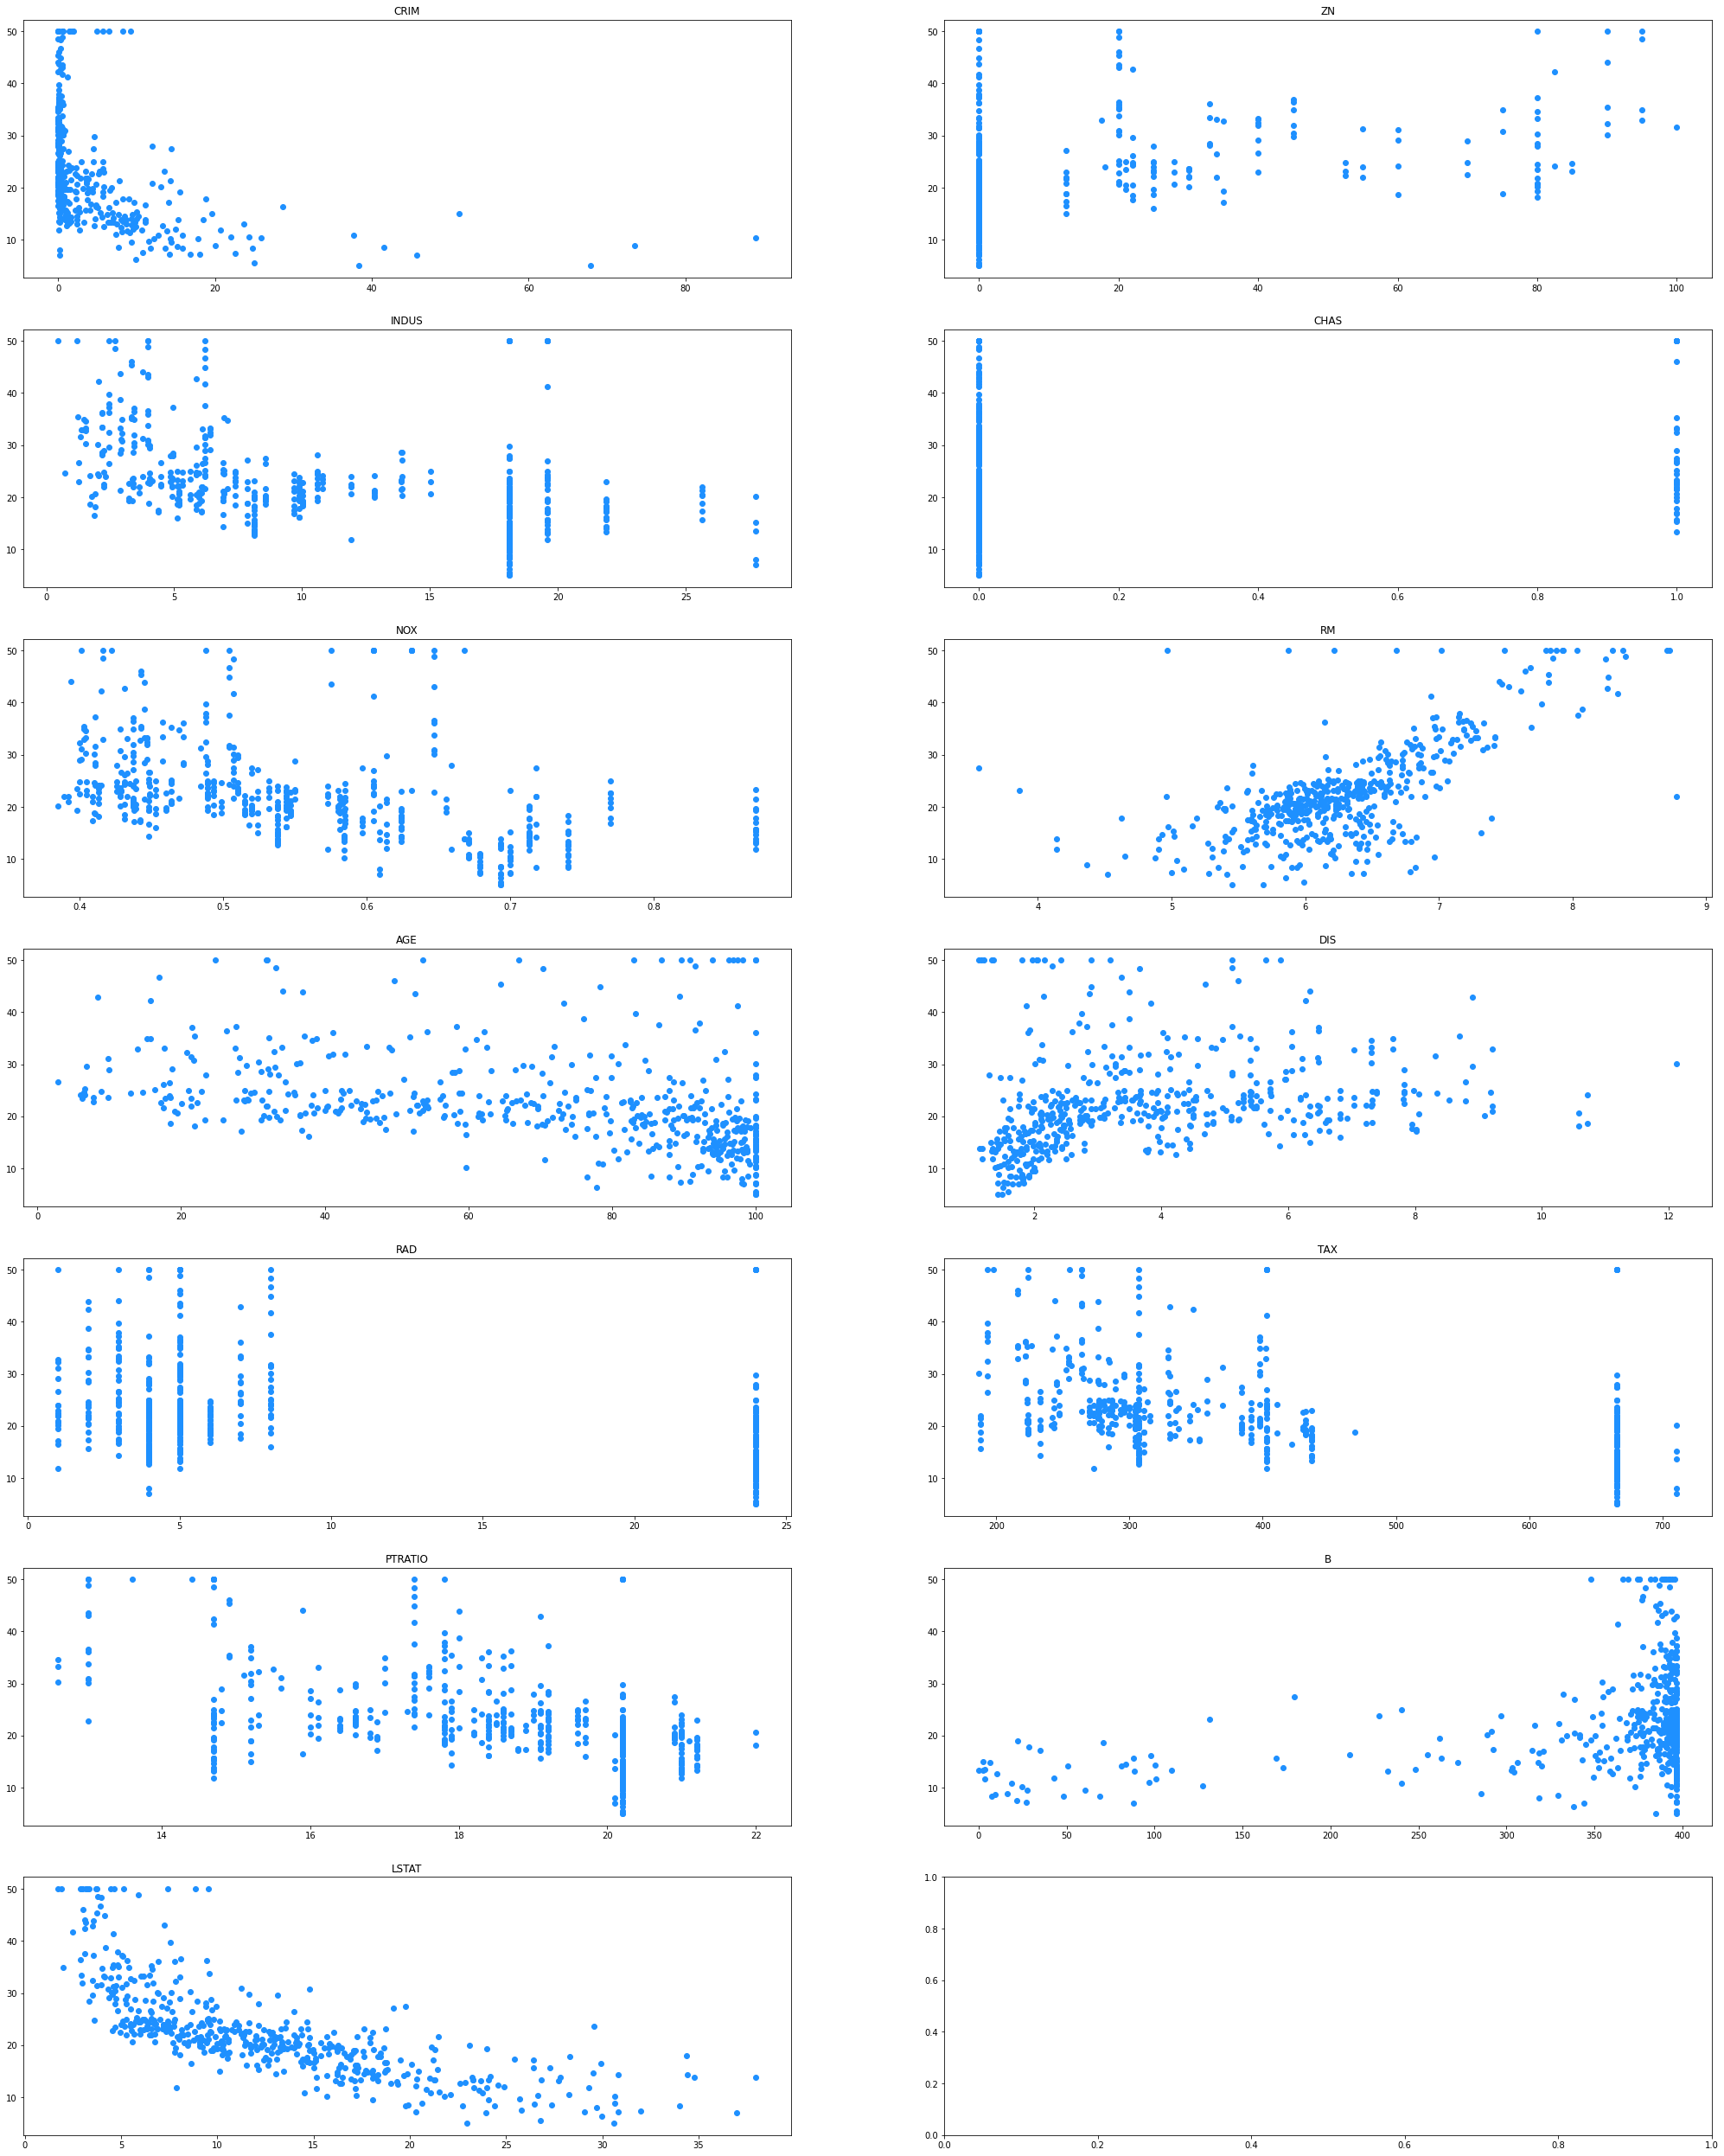

In [55]:
columns = 2
rows = 7
features = boston.feature_names

fig, axes = plt.subplots(rows, columns, figsize=(35,45))
row_index, col_index = 0,0

for i, feature in enumerate(features):
    selector = (boston['feature_names'] == str(feature))
    axes[row_index][col_index].scatter(X[:, selector], y, facecolor="dodgerblue")
    axes[row_index][col_index].set_title(feature)
    col_index += 1
    if (col_index == 2):
        col_index = 0
        row_index +=1 

**2.** Viendo los graficos "a ojo" se puede notar que los atributos de mayor importancia serian RM y LSTAT.

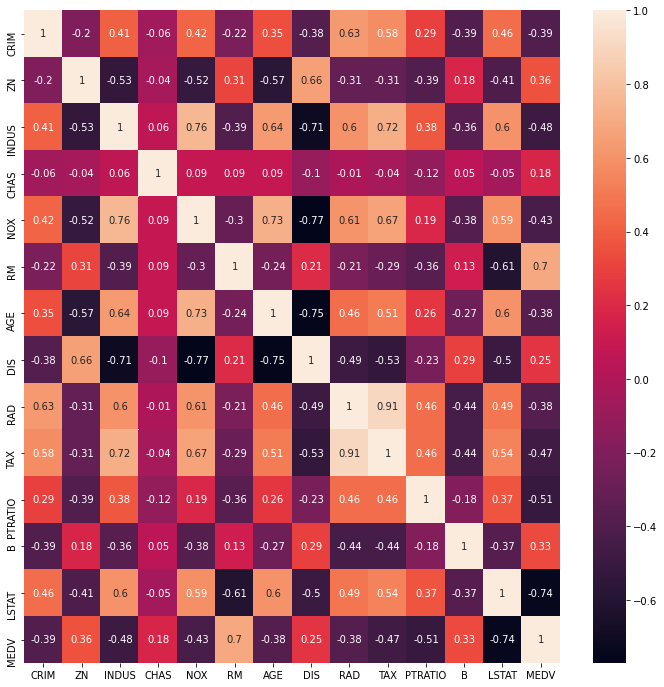

In [56]:
fig = plt.figure(figsize= (12, 12))
correlation_matrix = boston_df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

**3.** Con la tabla de correlación observada a continuación se confirma que la variable ojetivo presenta mayor correlación con los tributos mencionados previamente, en especial con 'RM' Y 'LSTAT'.

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [57]:
# 1. Resolver acá. Ayuda:
feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)
X_train_LSTAT = X_train[:, selector]
X_test_LSTAT = X_test[:, selector]
X_train_LSTAT.shape, X_test_LSTAT.shape

((404, 1), (102, 1))

Formula de Aprendizaje usada en clase:

$$w^* = (X^\top X)^{-1} X^\top y$$

In [58]:
# 2. Instanciar y entrenar acá.
# Algoritmo de aprendizaje: Minimos cuadrados
# El stack define el orden de los valores a retornar, en este caso el 1er valor retornado es el termino independiente (w0, conocido como bias)
# El segundo valor es el termino que se multiplica por x, y asi se obtiene los coeficientes de una recta.
def linear_least_squares(X, y):
    # Ver column_stack() vs stack()
    X_b = np.column_stack((np.ones(X.shape[0]), X))
    
    # np.linalg.pinv(X_b.T.dot(X_b)) = (X^T*X)^-1
    # X_b.T.dot(y) = X^T*y
    return np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))

print(X_train_LSTAT.shape, y_train.shape)
lineal_regression_w = linear_least_squares(X_train_LSTAT, y_train)
lineal_regression_w

(404, 1) (404,)


array([34.76519272, -0.95648761])

In [59]:
# Usando scikit-learn linear model
from sklearn import linear_model 

linear_least_squares_sk = linear_model.LinearRegression()
linear_least_squares_sk.fit(X_train_LSTAT, y_train)
linear_least_squares_sk.coef_

array([-0.95648761])

Predicción usada en clase:

$$f_{w^*}(x) = x^\top w^* = \sum_{k=1}^K x_k w^*_k$$

In [60]:
# 3. Predecir y evaluar acá.

# model or w, nuestro modelo, nuestro predictor
def predict(X, model):
    X_b = np.column_stack((np.ones(X.shape[0]), X))
    return X_b.dot(model)

y_train_prediction = predict(X_train_LSTAT, lineal_regression_w)
y_test_prediction = predict(X_test_LSTAT, lineal_regression_w)

y_train_prediction_sk = linear_least_squares_sk.predict(X_train_LSTAT)
y_test_prediction_sk = linear_least_squares_sk.predict(X_test_LSTAT)

# Calcular error cuadratico medio
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_prediction)
test_error = mean_squared_error(y_test, y_test_prediction)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

train_error_sk = mean_squared_error(y_train, y_train_prediction_sk)
test_error_sk = mean_squared_error(y_test, y_test_prediction_sk)
print(f'Train error SKL: {train_error_sk:f}')
print(f'Test error SKL: {test_error_sk:f}')



Train error: 36.523966
Test error: 46.336305
Train error SKL: 36.523966
Test error SKL: 46.336305


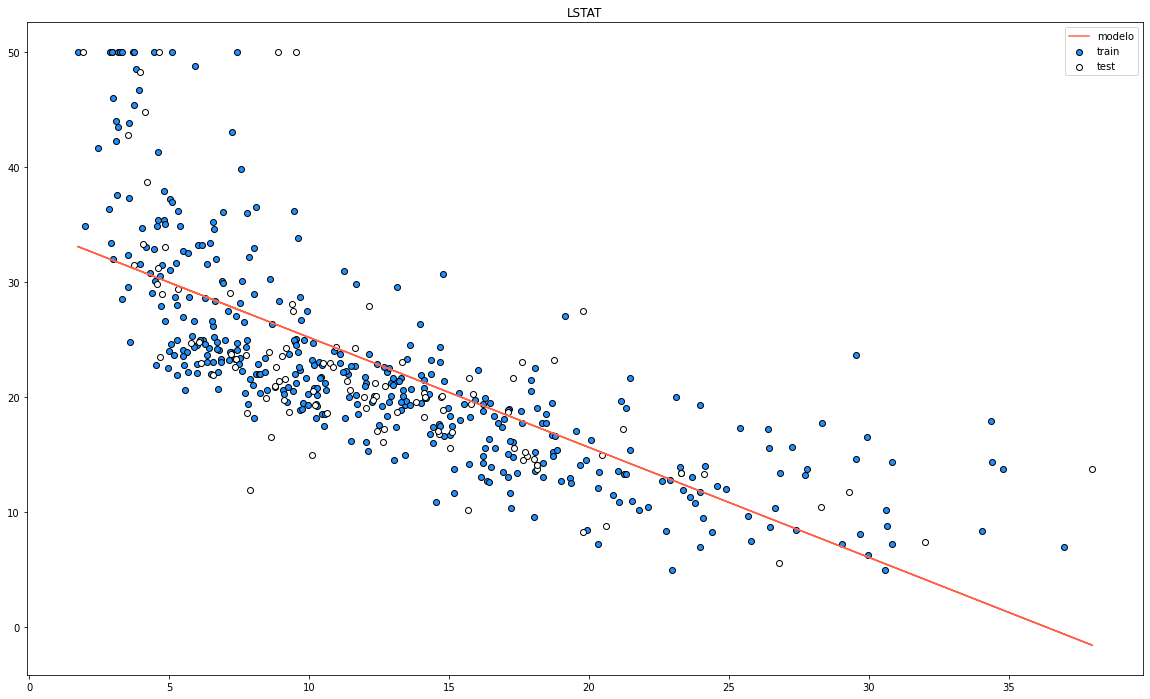

In [61]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_LSTAT), np.min(X_test_LSTAT))
x_end = max(np.max(X_train_LSTAT), np.max(X_test_LSTAT))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
model_function = predict(X[:, selector], lineal_regression_w)
# plt.plot(X, model_function, color="tomato", label="modelo")


fig = plt.figure(figsize=(20, 12))
plt.scatter(X_train_LSTAT, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_LSTAT, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X[:, selector], model_function, color="tomato", label="modelo")
plt.title(feature)
plt.legend()
plt.show()

**5.** A priori, pareciera ser que nuestro modelo no resulta adecuado, siendo que los MSE son bastante importantes en magnitud. Aunque visualmente a primera vista la curva nos resulta agradable, un modelo lineal no es la mejor opcion para resolver este problema.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [62]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degrees = range(11) # 0 to 10
coeficientes = []
train_errors = []
test_errors = []

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_LSTAT, y_train)
    
    # predict:
    y_train_pred_rp = model.predict(X_train_LSTAT)
    y_test_pred_rp = model.predict(X_test_LSTAT)
    
    # evaluate:
    train_error_rp = mean_squared_error(y_train, y_train_pred_rp)
    test_error_rp = mean_squared_error(y_test, y_test_pred_rp)
    train_errors.append(train_error_rp)
    test_errors.append(test_error_rp)
    
    coeficientes.append(lr.coef_)
    print(f'Grado polinomio: {degree} - Error entrenamiento: {train_error_rp:f} - Error test: {test_error_rp:f}')
    
# Chequeando los coeficientes
for i, coef in enumerate(coeficientes):
    print(f'###### Coeficients degree {i}')
    print(coef)

Grado polinomio: 0 - Error entrenamiento: 85.143720 - Error test: 81.582317
Grado polinomio: 1 - Error entrenamiento: 36.523966 - Error test: 46.336305
Grado polinomio: 2 - Error entrenamiento: 28.189172 - Error test: 38.846869
Grado polinomio: 3 - Error entrenamiento: 26.784846 - Error test: 37.224242
Grado polinomio: 4 - Error entrenamiento: 25.849433 - Error test: 34.704869
Grado polinomio: 5 - Error entrenamiento: 25.034963 - Error test: 34.834708
Grado polinomio: 6 - Error entrenamiento: 25.014028 - Error test: 34.326207
Grado polinomio: 7 - Error entrenamiento: 25.013535 - Error test: 34.261083
Grado polinomio: 8 - Error entrenamiento: 24.845823 - Error test: 36.415285
Grado polinomio: 9 - Error entrenamiento: 24.825940 - Error test: 34.916005
Grado polinomio: 10 - Error entrenamiento: 30.346069 - Error test: 61.427870
###### Coeficients degree 0
[22.61188119]
###### Coeficients degree 1
[34.76519272 -0.95648761]
###### Coeficients degree 2
[43.1090092  -2.36696305  0.04463347]
#

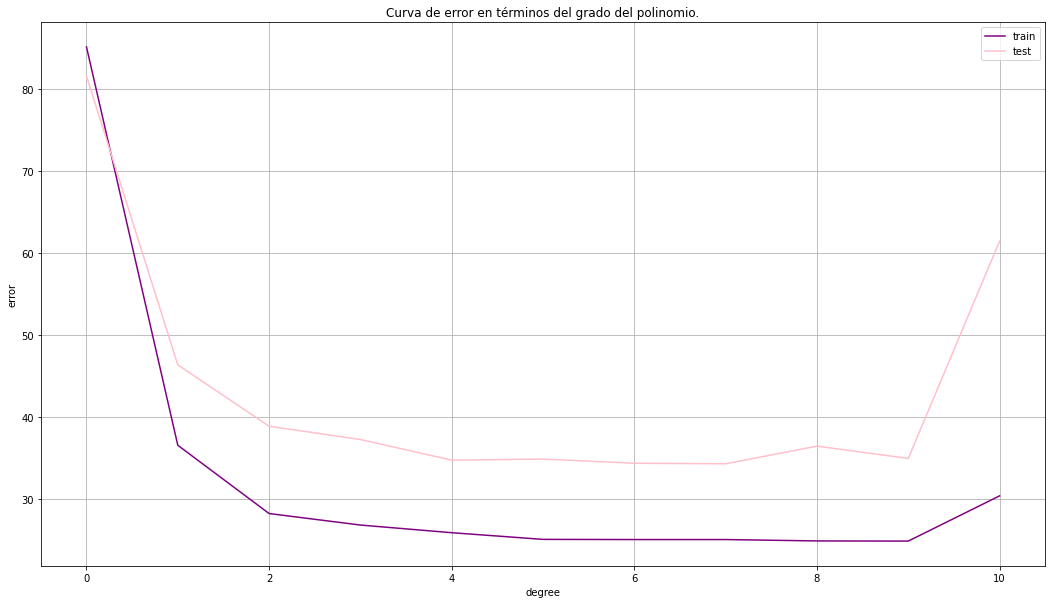

In [63]:
# 2. Graficar curvas de error acá.

fig = plt.figure(figsize=(18, 10))
plt.plot(degrees, train_errors, color="purple", label="train")
plt.plot(degrees, test_errors, color="pink", label="test")
plt.legend()
plt.title('Curva de error en términos del grado del polinomio.')
plt.xlabel("degree")
plt.ylabel("error")
plt.grid()
plt.show()

**3.** Hasta el grado 4 inclusive vemos como ambos errores disminuyen casi proporcionalmente. La gráfica nos indica que el sobreajuste se empieza a notar desde el grado 5, donde el error de test pasa a mantenerse constante o aumentar, para luego ser completamente inexacto a partir del grado 9.

In [64]:
# 4. Reconstruir mejor modelo acá y graficar.

degree = 4
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) # bias ya es un feature
best_model = make_pipeline(pf, lr)

best_model.fit(X_train_LSTAT, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=False))],
         verbose=False)

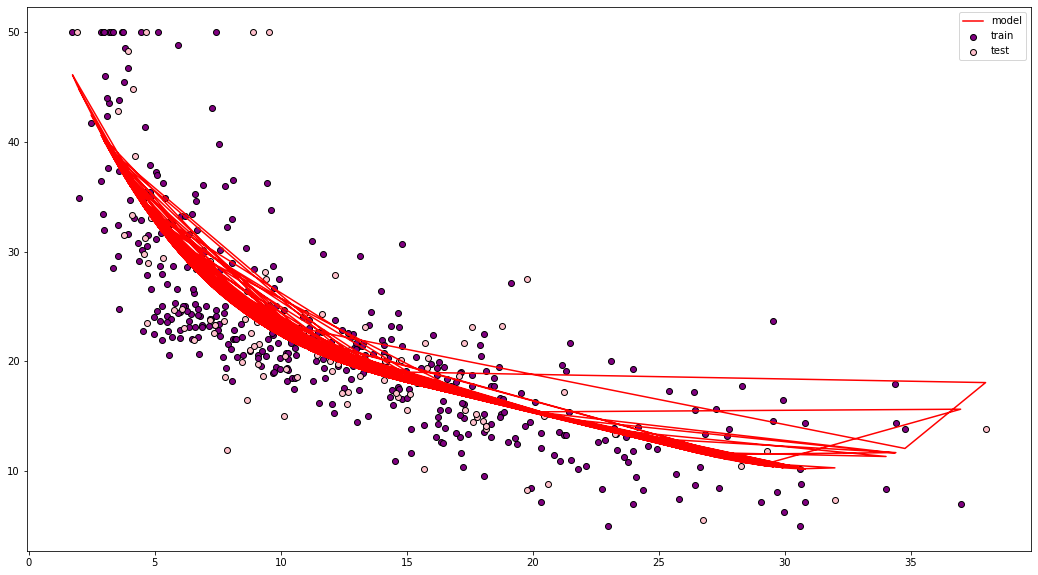

(25.84943285886594, 34.70486859830834)

In [65]:
fig = plt.figure(figsize=(18, 10))
plt.scatter(X_train_LSTAT, y_train, color="purple", edgecolor="k", label="train")
plt.scatter(X_test_LSTAT, y_test, color="pink", edgecolor="k", label="test")
plt.plot(X[:, selector], best_model.predict(X[:, selector].reshape(-1, 1)), color="red", label="model")
plt.legend()
plt.show()

train_errors[4], test_errors[4]

**5.** De acuerdo a la última gráfica, a los coeficientes (la complejidad), al error de test (34.704869) y de entrenamiento (25.849433), podemos decir que este modelo es el mejor de los generados con regresión polinomial. Elegimos el modelo generado a partir de un polinomio de grado 4 ya que no hay una mejoría significativa al aumentar el grado y al ser un grado chico la complejidad es considerablemente menor.

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [66]:
# 1. Resolver acá. Ayuda (con dos atributos):
feature_one = 'LSTAT'
feature_two = 'RM'

selector = (boston['feature_names'] == feature_one) | (boston['feature_names'] == feature_two)
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [67]:
# 2. Resolver acá.

degrees = range(1, 10)
coeficientes_multifeature = []
train_errors = []
test_errors = []

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train)
    
    # predict:
    y_train_pred_rp = model.predict(X_train_fs)
    y_test_pred_rp = model.predict(X_test_fs)
    
    # evaluate:
    train_error_rp = mean_squared_error(y_train, y_train_pred_rp)
    test_error_rp = mean_squared_error(y_test, y_test_pred_rp)
    train_errors.append(train_error_rp)
    test_errors.append(test_error_rp)
    
    coeficientes_multifeature.append(lr.coef_)
    print(f'Grado polinomio: {degree} - Error entrenamiento: {train_error_rp:f} - Error test: {test_error_rp:f}')
    

    
for i, coef in enumerate(coeficientes_multifeature, start=1):
    print(f'###### Coeficients degree {i}')
    print(coef)

Grado polinomio: 1 - Error entrenamiento: 28.790276 - Error test: 37.383106
Grado polinomio: 2 - Error entrenamiento: 18.659454 - Error test: 28.144972
Grado polinomio: 3 - Error entrenamiento: 17.077754 - Error test: 28.567166
Grado polinomio: 4 - Error entrenamiento: 14.188504 - Error test: 33.999233
Grado polinomio: 5 - Error entrenamiento: 12.905614 - Error test: 34.201414
Grado polinomio: 6 - Error entrenamiento: 12.352155 - Error test: 34.924639
Grado polinomio: 7 - Error entrenamiento: 12.206437 - Error test: 70.259774
Grado polinomio: 8 - Error entrenamiento: 11.943137 - Error test: 545.381995
Grado polinomio: 9 - Error entrenamiento: 12.195341 - Error test: 1105.408968
###### Coeficients degree 1
[-1.26252868  5.10906846 -0.65494879]
###### Coeficients degree 2
[ 5.84538051e+01 -1.46867521e+01  5.12342260e-01  1.69773861e+00
 -2.64734538e-01  1.08556128e-02]
###### Coeficients degree 3
[ 3.36674270e+02 -1.35603077e+02 -1.38317703e+01  1.86979322e+01
  4.19021313e+00  1.3022931

**3.** Podemos notar que para algunos grados (por ejemplo grados 2 y 3) ha ocurrido una mejora significativa en lo que respecta a test MSE y train MSE. Esto indica que al agregar un atributo mas para entrenar el modelo y por ende agregando "mas informacion" durante el entrenamiento se han encontrado modelos de menor complejidad pero mas eficaces. (Siendo que se agregó al entrenamiento el feature 'RM' en conjuncion con 'LSTAT').

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [68]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge 

feature_ejercicio7 = 'LSTAT'
selector = (boston['feature_names'] == feature_ejercicio7)
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

degrees = range(1,10)
coeficientes_ejercicio7 = []
train_errors = []
test_errors = []
alphas = [1, 0.2, 0.1, 0.001, 0.0001, 0.00002]

for degree in degrees:
    print("="*45)
    
    for alpha in alphas:
        # train:
        pf = PolynomialFeatures(degree)
        ridge_lr = Ridge(alpha)
        #lr = LinearRegression(fit_intercept=False)
        model = make_pipeline(pf, ridge_lr)
        model.fit(X_train_fs, y_train)

        # predict:
        y_train_pred_rp = model.predict(X_train_fs)
        y_test_pred_rp = model.predict(X_test_fs)

        # evaluate:
        train_error_rp = mean_squared_error(y_train, y_train_pred_rp)
        test_error_rp = mean_squared_error(y_test, y_test_pred_rp)
        train_errors.append(train_error_rp)
        test_errors.append(test_error_rp)

        coeficientes_ejercicio7.append(lr.coef_)
        print(f'Grado polinomio: {degree} - Error entrenamiento: {train_error_rp:f} - Error test: {test_error_rp:f} - <alpha> {alpha}')

#for coef in coeficientes_ejercicio7:
#    print(coef)
#    print("#"*30)

Grado polinomio: 1 - Error entrenamiento: 36.523967 - Error test: 46.336158 - <alpha> 1
Grado polinomio: 1 - Error entrenamiento: 36.523966 - Error test: 46.336276 - <alpha> 0.2
Grado polinomio: 1 - Error entrenamiento: 36.523966 - Error test: 46.336291 - <alpha> 0.1
Grado polinomio: 1 - Error entrenamiento: 36.523966 - Error test: 46.336305 - <alpha> 0.001
Grado polinomio: 1 - Error entrenamiento: 36.523966 - Error test: 46.336305 - <alpha> 0.0001
Grado polinomio: 1 - Error entrenamiento: 36.523966 - Error test: 46.336305 - <alpha> 2e-05
Grado polinomio: 2 - Error entrenamiento: 28.189181 - Error test: 38.844881 - <alpha> 1
Grado polinomio: 2 - Error entrenamiento: 28.189173 - Error test: 38.846469 - <alpha> 0.2
Grado polinomio: 2 - Error entrenamiento: 28.189172 - Error test: 38.846669 - <alpha> 0.1
Grado polinomio: 2 - Error entrenamiento: 28.189172 - Error test: 38.846867 - <alpha> 0.001
Grado polinomio: 2 - Error entrenamiento: 28.189172 - Error test: 38.846868 - <alpha> 0.0001
Gr

Por lo que observamos prácticamente los resultados no mejoran. Notamos una leve mejoria para algunos modelos y con un alpha bastante chico (0.00002). Se puede ver que para los modelos donde el polinomio es grado 9 y 4 hay una mejoria en sus test MSE, pero bastante leve. Y por ejemplo en el de grado 4 el mejor resultado que se termina obteniendo (con alpha 0.00002) es igual al que obtuvimos anteriormente sin aplicar regularización. En los otros modelos usando la regularizacion Ridge se notan desmejorias en los MSE como puede notarse en el output de arriba.